In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as pit
from google.colab.patches import cv2_imshow
import math
import matplotlib.pyplot as plt
#from google.colab import drive
#drive.mount('/content/drive')

[[  7   7   7 ...   8   7   7]
 [  7   7   7 ...   8   6   6]
 [  7   7   7 ...   7   5   5]
 ...
 [106 105 103 ... 126 132 134]
 [106 105 103 ... 119 132 134]
 [106 105 103 ... 114 132 134]]
(315, 474)


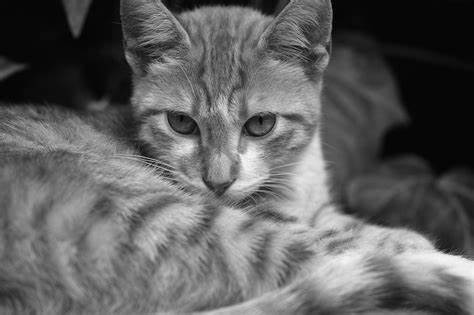

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/cat.jpg',0)
print(image)
print(image.shape)
cv2_imshow(image)
height,width=image.shape

In [ ]:
image[150,20:40]

array([111, 113, 107,  97, 105, 109, 113, 116, 118, 119, 119, 117, 110,
       119, 120, 115, 111, 107, 108, 119], dtype=uint8)

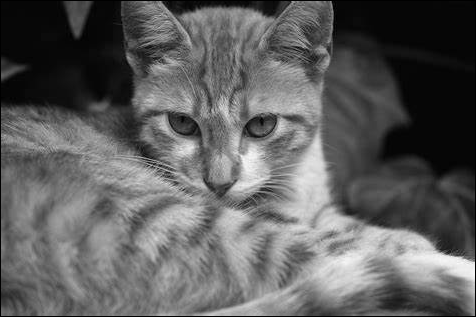

In [ ]:
padding_value = 1
padding_image=[]
for i in range(height + 2*padding_value):
    row_pixels = []
    for j in range(width + 2*padding_value):
        if i >= padding_value and i < height + padding_value and j >= padding_value and j < width + padding_value:
            row_pixels.append(image[i-padding_value, j-padding_value])
        else:
            row_pixels.append(0)
    padding_image.append(row_pixels)

padding_image = np.array(padding_image, dtype=np.uint8)

cv2_imshow(padding_image)

In [ ]:
padding_image[1,1]

7

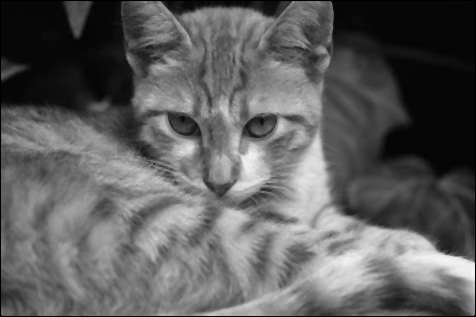

In [ ]:
import numpy as np
import cv2

def apply_median_filter(image):
    filtered_image = np.zeros(image.shape, dtype=np.uint8)
    height, width = image.shape

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Extract the 3x3 neighborhood
            neighborhood = image[i-1:i+2, j-1:j+2]

            # Flatten the neighborhood to a 1D array and sort it
            sorted_pixels = np.sort(neighborhood.flatten())

            # Select the median value
            median_value = sorted_pixels[len(sorted_pixels) // 2]

            # Assign the median value to the corresponding pixel
            filtered_image[i, j] = median_value

    return filtered_image


# Apply the median filter
filtered_image = apply_median_filter(padding_image)

# show the filtered image
cv2_imshow(filtered_image)


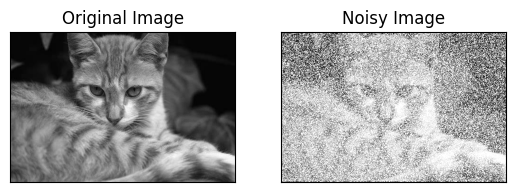

In [ ]:
def guasssian_noise(image):
  mean = 0
  std_dev = 30

  # get array of integer values that represent the noise
  noise = np.random.normal(mean, std_dev, image.shape).astype(np.uint8)
  # for every pixel add the corresponding noise value to it
  noisy_image = cv2.add(image, noise)

  # return the noisy image
  return noisy_image

noisy_image = guasssian_noise(padding_image)
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
plt.show()

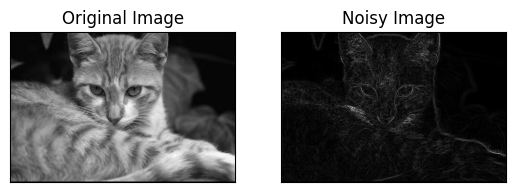

In [ ]:

def roberts_cross_gradient(image):


    # Create Roberts kernels
    Gx = np.array([[1, 0],
                   [0, -1]])

    Gy = np.array([[0, 1],
                   [-1, 0]])

    # Create output image
    output_image = np.zeros_like(image)

    # Iterate over each pixel, excluding border pixels
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            # Compute gradient in x-direction (Gx)
            gx = np.sum(np.multiply(Gx, image[i-1:i+1, j-1:j+1]))

            # Compute gradient in y-direction (Gy)
            gy = np.sum(np.multiply(Gy, image[i-1:i+1, j-1:j+1]))

            # Compute gradient magnitude
            gradient_magnitude = np.sqrt(np.power(gx,2) + np.power(gy,2))


            # Assign gradient magnitude to output image
            output_image[i, j] = gradient_magnitude

    return output_image

# Apply Roberts cross-gradient operators
output = roberts_cross_gradient(padding_image)

plt.subplot(121), plt.imshow(padding_image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(output, cmap='gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
# median filter - robert - guasssian noise --> done
# next guassian filter - histo spec

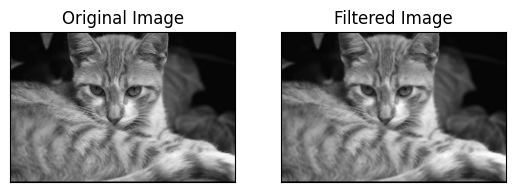

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def apply_gaussian_filter(image):
    kernel = np.array([[1, 2, 1],
                       [2, 4, 2],
                       [1, 2, 1]])

    # Create output image
    filtered_image = np.empty_like(image)
    filtered_image[:] = image
    height, width = filtered_image.shape

    # Perform convolution
    for r in range(padding_value, height - padding_value):
        for c in range(padding_value, width - padding_value):
            total = 0

            for i in range(-1, 2):
                for j in range(-1, 2):
                    total += image[r + i, c + j] * kernel[i + 1, j + 1]

            filtered_image[r, c] = total / np.sum(kernel)

    return filtered_image

# Assuming you have the 'padding_image' defined and imported

filtered_image = apply_gaussian_filter(padding_image)

plt.subplot(121), plt.imshow(padding_image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()



In [ ]:
padding_image[150,20:40],filtered_image[150,20:40]

(array([120, 121, 125, 125, 121, 128, 129, 127, 117, 105,  99, 103, 110,
         84, 120, 121, 117, 134, 124, 116], dtype=uint8),
 array([118, 119, 121, 121, 120, 121, 123, 121, 115, 108, 105, 107, 105,
        103, 113, 121, 124, 126, 124, 124], dtype=uint8))

In [ ]:
# median filter - robert - guasssian noise - guassian filter --> done
# next histo spec

In [ ]:
kernel = np.array([[1, 2, 3],
                       [4, 90, 6],
                       [7, 8, 9]])
# Flatten the neighborhood to a 1D array and sort it
sorted_pixels = np.sort(kernel.flatten())


# Select the median value
median_value = sorted_pixels[len(sorted_pixels) // 2]

sorted_pixels , median_value

(array([ 1,  2,  3,  4,  6,  7,  8,  9, 90]), 6)

[   20    13    23    45   181   511 12595  4293  2074   938   667  1035
   539   741   836   583   522   442   500   418   443   296   229   211
   200   231   238   229   264   248   268   299   285   307   256   286
   292   261   281   313   369   354   366   441   473   495   489   515
   520   509   527   490   574   623   627   580   601   605   578   609
   650   622   683   698   708   701   696   653   704   705   679   698
   694   714   706   693   784   762   802   736   803   761   739   750
   767   832   837   843   899   828   848   830   801   757   780   849
   883   831   900   913   938   919   928  1012   964  1003  1063   984
   997  1027  1059  1083  1043  1027  1151  1097  1101  1078  1108  1034
  1043  1052  1019   967  1101  1031  1060  1083  1062  1019   983  1006
  1009   913   965   955   879   889   884   865   888   840   804   865
   868   837   819   792   748   707   688   753   714   717   689   657
   642   603   639   558   534   495   500   500   

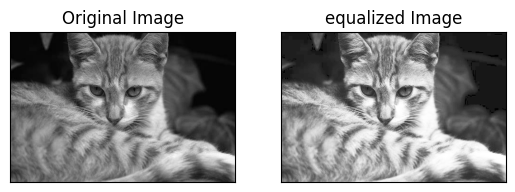

In [ ]:
import numpy as np
import cv2

def float2int(img):


    img = np.round(img, 0)
    img = np.minimum(img, 255)
    img = np.maximum(img, 0)
    img = img.astype('uint8')

    return img


def equalizeHistogram(img):

    img_height = img.shape[0]
    img_width = img.shape[1]
    histogram = np.zeros([256], np.int32)


    # calculate histogram
    for i in range(0, img_height):
        for j in range(0, img_width):
            histogram[img[i, j]] +=1
    print(histogram)

    # calculate pdf of the image
    pdf_img = histogram / histogram.sum()
    print(pdf_img)
    ### calculate cdf
    # cdf initialize .
    # Why does the type np.int32?
    #cdf = np.zeros([256], np.int32)
    cdf = np.zeros([256], float)

    # # For loop for cdf
    # for i in range(0, 256):
    #     for j in range(0, i+1):
    #         cdf[i] += pdf_img[j]
    # print(cdf)
    # You may implement the "accumulated sum" in a more efficient way:
    cdf = np.zeros(256, float)
    cdf[0] = pdf_img[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + pdf_img[i]

    cdf_eq = np.round(cdf * 255, 0) # mapping, transformation function T(x)

    print(cdf_eq)

    imgEqualized = np.zeros((img_height, img_width))

    # for mapping input image to s.
    for i in range(0, img_height):
        for j in range(0, img_width):
            r = img[i, j] # feeding intensity levels of pixels into r.
            s = cdf_eq[r] # finding value of s by finding r'th position in the cdf_eq list.
            imgEqualized[i, j] = s # mapping s thus creating new output image.

    # calculate histogram equalized image here
    # imgEqualized = s # change this

    return imgEqualized

# 2.2 obtain the histogram equalized images using the above function
img_eq_low = equalizeHistogram(image)
img_eq_low = float2int(img_eq_low)

# Use cv2.imshow (instead of plt.imshow) just for testing.
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_eq_low, cmap='gray')
plt.title('equalized Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
img_eq_low[150,20:40],image[150,20:40]

(array([146, 149, 139, 122, 135, 142, 149, 155, 159, 160, 160, 157, 144,
        160, 162, 153, 146, 139, 140, 160], dtype=uint8),
 array([111, 113, 107,  97, 105, 109, 113, 116, 118, 119, 119, 117, 110,
        119, 120, 115, 111, 107, 108, 119], dtype=uint8))

In [ ]:
histogram = np.zeros([256], np.int32)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)